In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [ ]:
from deepview.datasets.iterators import TFObjectDetectionIterator

In [21]:
# Loading dataset from ModelPack 2.x
config_file = "path to a yaml file representing a dataset" # either of ModelPack yaml file or Yolov7: https://github.com/WongKinYiu/yolov7/blob/main/data/coco.yaml
handler = TFObjectDetectionIterator(from_config=config_file, shape=(320, 320, 3))
handler.classes

['ace',
 'nine',
 'six',
 'four',
 'eight',
 'queen',
 'seven',
 'king',
 'ten',
 'jack',
 'five',
 'two',
 'three']

In [23]:
train_iter = handler.get_train_iterator().iterator()
val_iter = handler.get_val_iterator().iterator()

In [24]:
print("Num training samples: ", len(train_iter))
print("Num validation samples: ", len(val_iter))

for img, boxes in train_iter:
    print(img.shape, boxes.shape)
    break

for img, boxes in val_iter:
    print(img.shape, boxes.shape)
    break


Num training samples:  1328
Num validation samples:  148
(320, 320, 3) (4, 5)
(320, 320, 3) (4, 5)


In [ ]:
# Run this cell if you want to visualize images
! pip install opencv-python
! pip install matplotlib

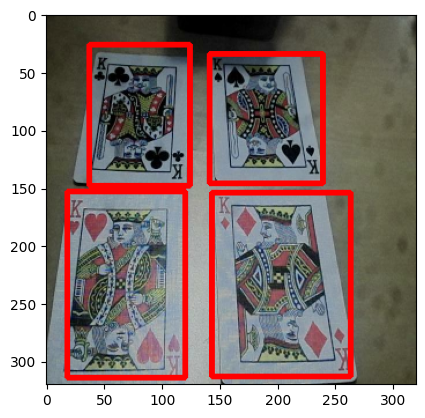

In [25]:

import matplotlib.pyplot as plt
import numpy as np
import cv2

img = img.numpy().astype(np.uint8)
for xc, yc, w, h, _ in boxes:
    x1 = int((xc - w * 0.5) * 320)
    x2 = int((xc + w * 0.5) * 320)

    y1 = int((yc - h * 0.5) * 320)
    y2 = int((yc + h * 0.5) * 320)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(img)
